<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install --upgrade matplotlib
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [3]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  31.0M      0 --:--:-- --:--:-- --:--:-- 31.0M


In [4]:
import pandas as pd

# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [5]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [6]:
df['country'].value_counts()

US                        24898
France                    10285
Italy                      9192
Spain                      3069
Portugal                   2661
Chile                      2054
Argentina                  1748
Austria                    1532
Australia                  1068
Germany                     962
New Zealand                 679
South Africa                670
Israel                      232
Greece                      221
Canada                      103
Bulgaria                     64
Uruguay                      61
Romania                      59
Hungary                      56
Croatia                      43
Turkey                       40
Georgia                      37
Slovenia                     33
England                      32
Mexico                       30
Brazil                       29
Moldova                      29
Lebanon                      19
Morocco                       8
Macedonia                     6
Serbia                        6
Peru    

In [7]:
#df_cty=df['country'].value_counts().unique()
#df_cty.name

In [8]:
"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

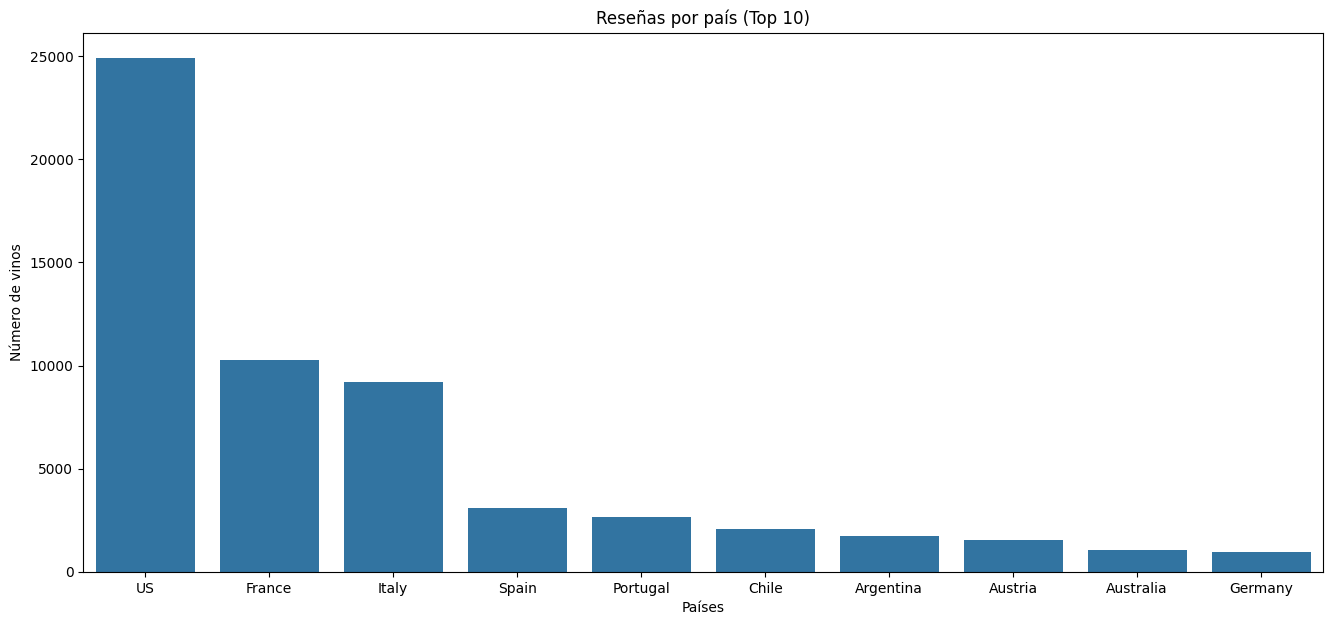

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

plt.figure(figsize=(16,7))
sns.barplot(x=x[:10], y=y[:10])

# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

In [10]:
promedios = df["price"].groupby(df["variety"]).mean()
promedios

variety
Abouriou       75.000000
Agiorgitiko    24.343750
Aglianico      39.071429
Aidani         27.000000
Airen           8.500000
                 ...    
Zinfandel      30.066182
Zlahtina       13.000000
Zweigelt       22.680556
Çalkarası      19.000000
Žilavka        15.000000
Name: price, Length: 580, dtype: float64

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

In [11]:
promedios = df["price"].groupby(df["variety"]).mean().sort_values(ascending=False)
promedios

variety
Terrantez             236.0
Bual                  212.0
Rosenmuskateller      150.0
Cabernet-Shiraz       150.0
Malbec-Cabernet       147.5
                      ...  
Ekigaïna                NaN
Madeira Blend           NaN
Sämling                 NaN
Tempranillo-Malbec      NaN
Zelen                   NaN
Name: price, Length: 580, dtype: float64

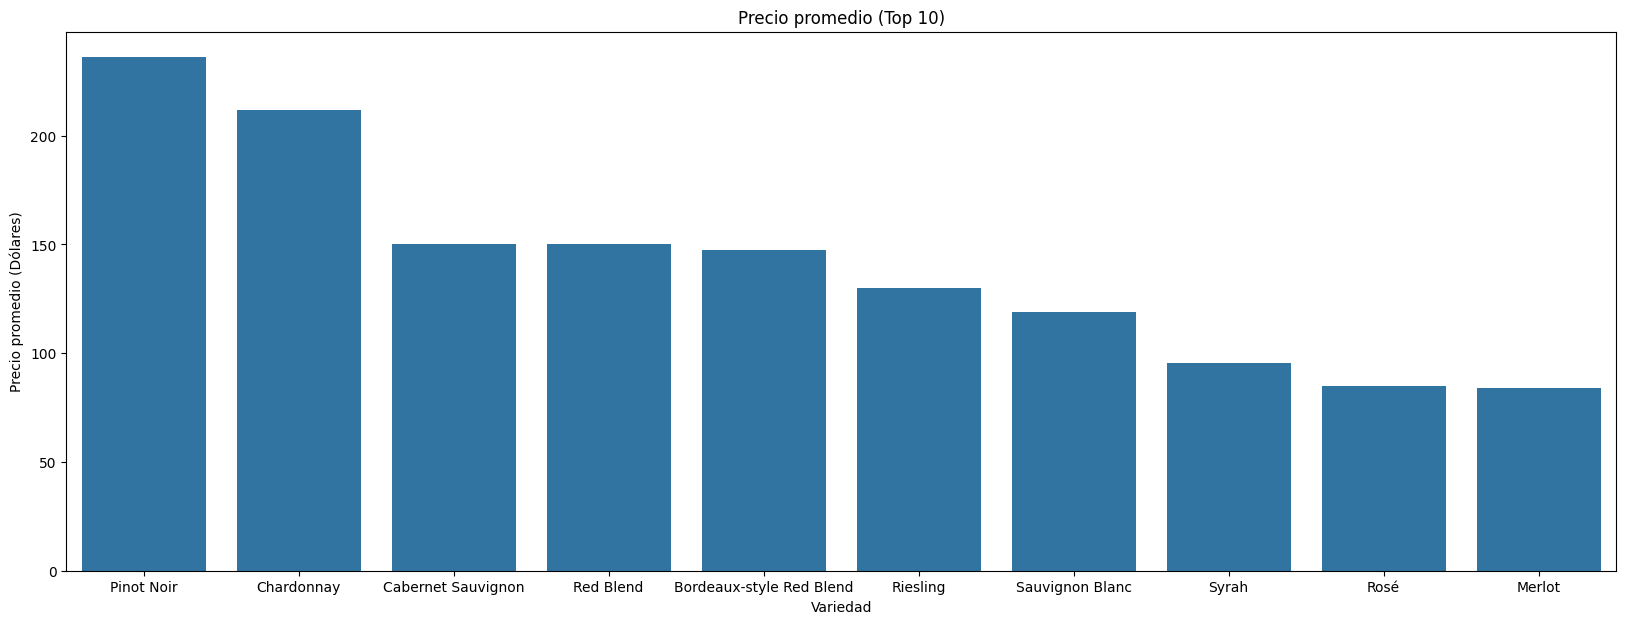

In [12]:
"""
SECUENCIA:
1.- Seleccionar las columna "price" y "variety"
2.-

"""
#promedios = df.["price"].df.groupby["variety"] #<COMPLETA>
promedios = df["price"].groupby(df["variety"]).mean().sort_values(ascending=False)

conteos_variety=df.variety.value_counts()

x=conteos_variety.index
y=promedios.values

plt.figure(figsize=(20,7))

sns.barplot(x=x[:10], y=y[:10])

plt.xlabel("Variedad")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

plt.show()

#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

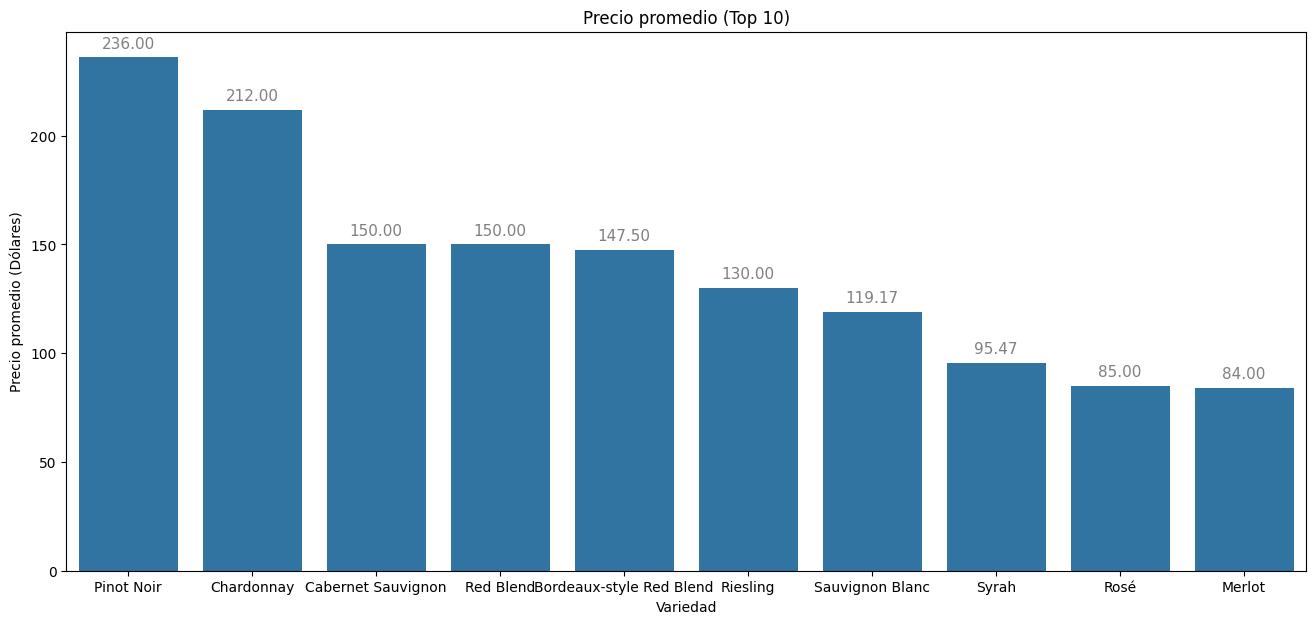

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x[:10], y=y[:10])

plt.xlabel("Variedad")
plt.ylabel("Precio promedio (Dólares)")
plt.title("Precio promedio (Top 10)")

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

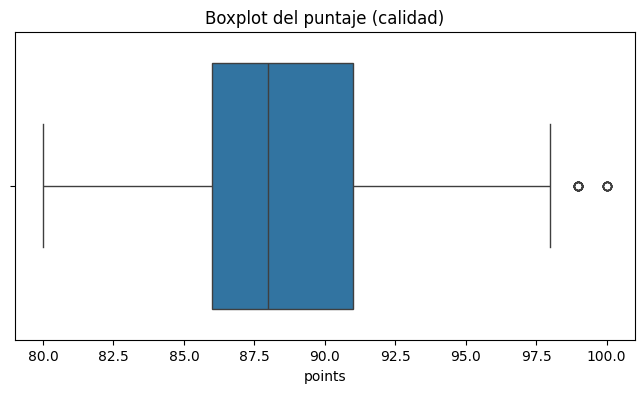

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

In [15]:
conteos_variety=df.variety.value_counts()
conteos_variety

Pinot Noir                   6096
Chardonnay                   5343
Cabernet Sauvignon           4353
Red Blend                    4179
Bordeaux-style Red Blend     3164
                             ... 
Rieslaner                       1
Casavecchia                     1
Pinot Gris-Gewürztraminer       1
Freisa                          1
Cabernet-Shiraz                 1
Name: variety, Length: 580, dtype: int64

In [16]:
x=conteos_variety.index
x

Index(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah',
       'Rosé', 'Merlot',
       ...
       'Carmenère-Syrah', 'Mavroudi', 'Tinto Velasco',
       'Pinot Blanc-Pinot Noir', 'Hárslevelü', 'Rieslaner', 'Casavecchia',
       'Pinot Gris-Gewürztraminer', 'Freisa', 'Cabernet-Shiraz'],
      dtype='object', length=580)

In [17]:
#promedios
promedios = df["price"].groupby([df["variety"], df["country"]]).mean().sort_values(ascending=False)#.head(10)
promedios

variety             country    
Carignan            Spain          263.5
Terrantez           Portugal       236.0
Bual                Portugal       212.0
Muscadelle          Australia      210.0
Pinot Noir          Switzerland    160.0
                                   ...  
Sämling             Austria          NaN
Tempranillo-Malbec  Argentina        NaN
Verdelho            France           NaN
White Port          Portugal         NaN
Zelen               Slovenia         NaN
Name: price, Length: 1277, dtype: float64

In [18]:
#puntaje
puntaje= df["points"].groupby([df["variety"], df["country"]]).mean().sort_values(ascending=False)#.head(10)
puntaje

variety              country  
Bual                 Portugal     96.500000
Cabernet-Shiraz      Australia    96.000000
Muscadelle           Australia    95.333333
Muscat               Australia    95.333333
Terrantez            Portugal     95.000000
                                    ...    
Verdejo              US           81.000000
Malvar               Spain        81.000000
Chardonnay-Semillon  Argentina    81.000000
Tempranillo          Israel       81.000000
Moscato              Chile        80.750000
Name: points, Length: 1277, dtype: float64

In [19]:
conteos_variety=df.variety.value_counts()
#conteos_variety_promedios=puntaje.value_counts()

#x=conteos_variety_promedios.index
x=conteos_variety.index
y=promedios.values

x

Index(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah',
       'Rosé', 'Merlot',
       ...
       'Carmenère-Syrah', 'Mavroudi', 'Tinto Velasco',
       'Pinot Blanc-Pinot Noir', 'Hárslevelü', 'Rieslaner', 'Casavecchia',
       'Pinot Gris-Gewürztraminer', 'Freisa', 'Cabernet-Shiraz'],
      dtype='object', length=580)

In [20]:
y

array([263.5, 236. , 212. , ...,   nan,   nan,   nan])

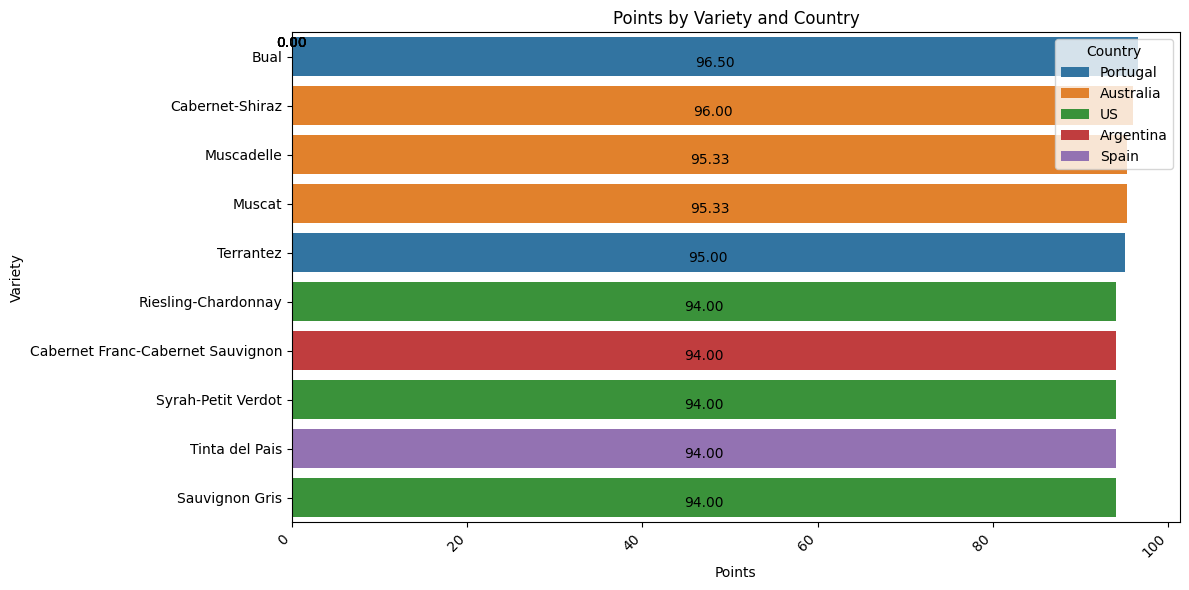

In [21]:
#Gráfica de Puntaje
puntaje= df["points"].groupby([df["variety"], df["country"]]).mean().sort_values(ascending=False).head(10)
puntaje
# Convert the result to a DataFrame

puntaje_df = puntaje.reset_index()
puntaje_df.columns = ['Variety', 'Country', 'Mean Points']

# Create the barplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
barplot = sns.barplot(x='Mean Points', y='Variety', hue='Country', data=puntaje_df)

# Add labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

# Add title and labels
plt.title('Points by Variety and Country')
plt.xlabel('Points')
plt.ylabel('Variety')

# Rotate x-axis labels for better readability
plt.xticks(rotation= 45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

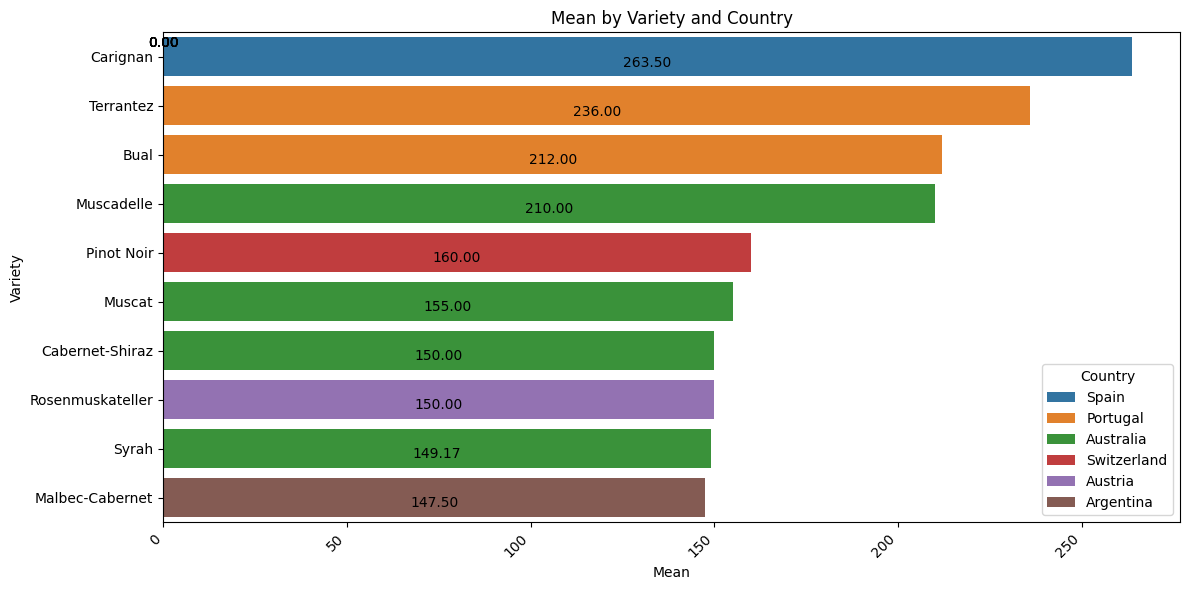

In [22]:
#Gráfica de Promedios
promedios_precios = df["price"].groupby([df["variety"], df["country"]]).mean().sort_values(ascending=False).head(10)
# Convert the result to a DataFrame

promedios_precios_df = promedios_precios.reset_index()
promedios_precios_df.columns = ['Variety', 'Country', 'Mean']

# Create the barplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
barplot = sns.barplot(x='Mean', y='Variety', hue='Country', data=promedios_precios_df)

# Add labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

# Add title and labels
plt.title('Mean by Variety and Country')
plt.xlabel('Mean')
plt.ylabel('Variety')

# Rotate x-axis labels for better readability
plt.xticks(rotation= 45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
puntaje= df["points"].groupby([df["variety"], df["country"]]).mean().sort_values(ascending=False)#.head(10)
promedios_precios = df["price"].groupby([df["variety"], df["country"]]).mean().sort_values(ascending=False)#.head(10)

# Convert the series to a DataFrame
df_puntaje = puntaje.reset_index()
df_promedios_precios = promedios_precios.reset_index()

# Merge the two DataFrames on variety and country
merged_df = pd.merge(df_puntaje, df_promedios_precios, on=['variety', 'country'])

# Calculate the new variable 'Razon_calidad_precio'
merged_df['Razon_calidad_precio'] = merged_df['points'] / merged_df['price']

merged_df_sorted = merged_df.sort_values(by="Razon_calidad_precio", ascending=False)
merged_df_top = merged_df_sorted.groupby(['variety', 'country'])#.head(10)
merged_df_top


<Figure size 1000x500 with 0 Axes>

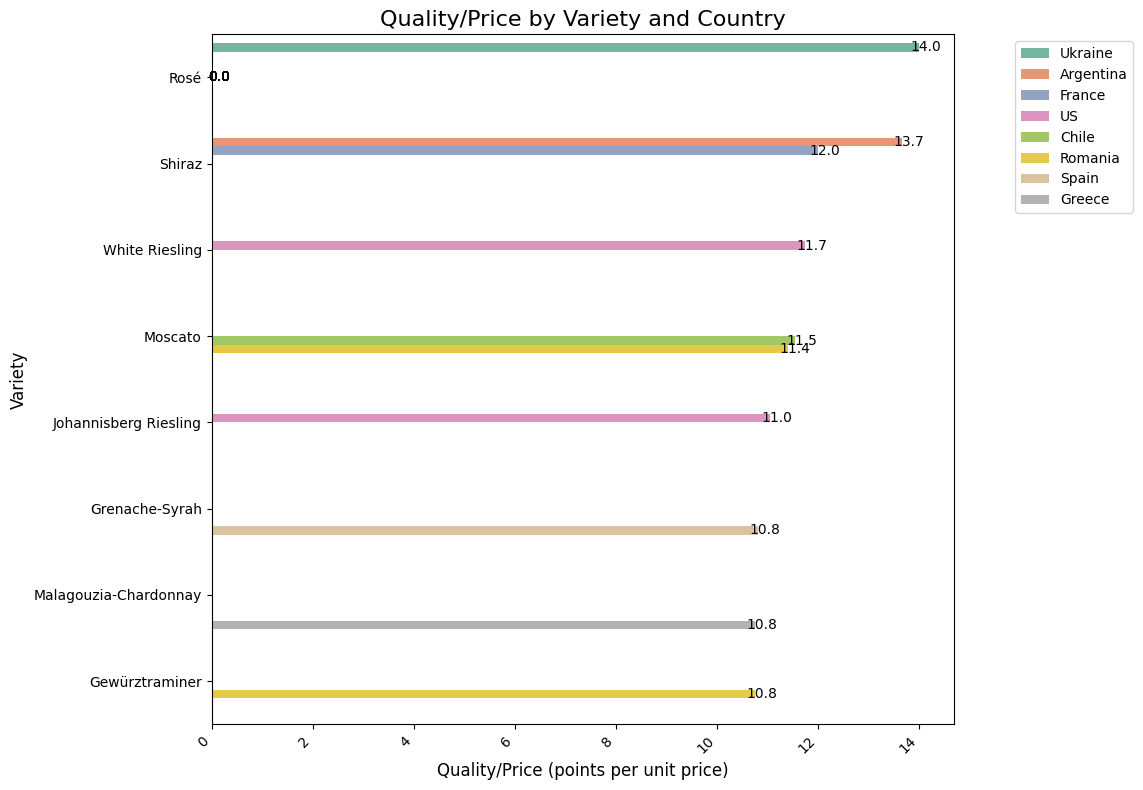

In [24]:
#This is the required chart

plt.figure(figsize=(10,5))

#puntaje
puntaje= df["points"].groupby([df["variety"], df["country"]]).mean().sort_values(ascending=False)#.head(10)

#promedios
promedios_precios = df["price"].groupby([df["variety"], df["country"]]).mean().sort_values(ascending=False)#.head(10)

# Convert the series to a DataFrame
df_puntaje = puntaje.reset_index()
df_promedios_precios = promedios_precios.reset_index()

# Merge the two DataFrames on variety and country
merged_df = pd.merge(df_puntaje, df_promedios_precios, on=['variety', 'country'])

# Calculate the new variable 'Razon_calidad_precio'
merged_df['Razon_calidad_precio'] = merged_df['points'] / merged_df['price']
merged_df_sorted = merged_df.sort_values(by="Razon_calidad_precio", ascending=False)
merged_df_sorted = merged_df_sorted.reset_index()

# Convert the result to a DataFrame
df_merged_df_top = merged_df_sorted.groupby(['variety', 'country'])['Razon_calidad_precio'].mean().reset_index()
df_merged_df_top = df_merged_df_top.sort_values(by="Razon_calidad_precio", ascending=False).head(10)
df_merged_df_top.columns = ['Variety', 'Country', 'Razon_calidad_precio']

plt.figure(figsize=(12, 8))

# Create the barplot with a specified color palette
barplot = sns.barplot(x='Razon_calidad_precio', y='Variety', hue='Country', data=df_merged_df_top, palette="Set2")

# Move legend outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Add labels to the bars with adjusted position
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.1f'),
                     (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                     ha = 'center', va = 'center',
                     xytext = (5, 0),
                     textcoords = 'offset points')

# Add title and labels with increased font sizes
plt.title('Quality/Price by Variety and Country', fontsize=16)
plt.xlabel('Quality/Price (points per unit price)', fontsize=12)
plt.ylabel('Variety', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

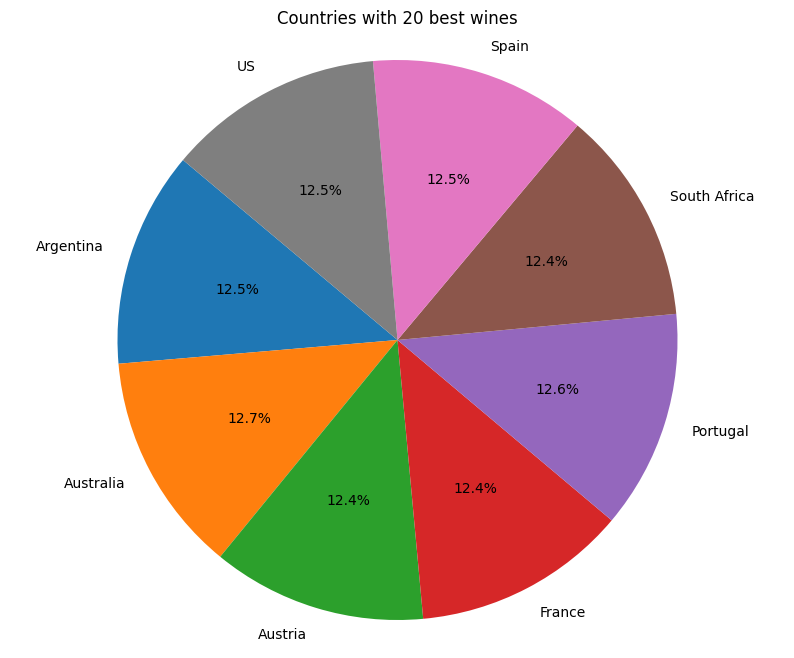

In [25]:
#Gráfica de Puntaje
puntaje_20= df["points"].groupby([df["variety"], df["country"]]).mean().sort_values(ascending=False).head(20)
puntaje_20
# Convert the result to a DataFrame
puntaje_20df = puntaje_20.reset_index()
puntaje_20df.columns = ['Variety', 'Country', 'Points']
puntaje_20df =  puntaje_20df.reset_index()

#puntaje_20df.columns
#puntaje_20df
# Calculate the average points by country
average_points_by_country = puntaje_20df.groupby('Country')['Points'].mean().reset_index()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(average_points_by_country['Points'], labels=average_points_by_country['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Countries with 20 best wines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [26]:
#top10_varieties = df['variety'].value_counts().head(10)
#proportions = round((top10_varieties / len(df)) * 100, 1)
top10_varieties = df['variety'].value_counts()
proportions = round((top10_varieties.head(10) / len(top10_varieties)), 1)
proportions

Pinot Noir                  10.5
Chardonnay                   9.2
Cabernet Sauvignon           7.5
Red Blend                    7.2
Bordeaux-style Red Blend     5.5
Riesling                     4.1
Sauvignon Blanc              4.0
Syrah                        3.3
Rosé                         2.7
Merlot                       2.4
Name: variety, dtype: float64

### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [27]:
Bodegas = df['winery'].value_counts()
proportions = round(Bodegas.head(20) / (len(Bodegas)),4)
#round((top10_varieties.head(10) / len(top10_varieties)), 1)
proportions

Georges Duboeuf               0.0083
Wines & Winemakers            0.0082
Testarossa                    0.0074
Louis Latour                  0.0066
Chateau Ste. Michelle         0.0066
Williams Selyem               0.0066
DFJ Vinhos                    0.0066
Concha y Toro                 0.0059
Gary Farrell                  0.0056
Lynmar                        0.0055
Kendall-Jackson               0.0052
Robert Mondavi                0.0050
Columbia Crest                0.0043
Trapiche                      0.0043
Undurraga                     0.0043
Siduri                        0.0042
Albert Bichot                 0.0042
Jean-Luc and Paul Aegerter    0.0040
Casa Santos Lima              0.0040
Rodney Strong                 0.0040
Name: winery, dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                59964 non-null  object 
 1   description            59995 non-null  object 
 2   designation            42728 non-null  object 
 3   points                 59995 non-null  int64  
 4   price                  55750 non-null  float64
 5   province               59964 non-null  object 
 6   region_1               50163 non-null  object 
 7   region_2               23068 non-null  object 
 8   taster_name            47586 non-null  object 
 9   taster_twitter_handle  45381 non-null  object 
 10  title                  59995 non-null  object 
 11  variety                59995 non-null  object 
 12  winery                 59995 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 6.0+ MB


### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [29]:
#Filtrar el DataFrame para incluir solo las 10 variedades de uva y las 20 bodegas más importantes.
#Seleccionar las columnas país, bodega, variedad, puntuación y precio.
#Calcular la columna adicional para el valor de puntos/precio.
#Cambiar el nombre de la bodega para que incluya su país de origen.
#Ordenar los datos por país, variedad y bodega en orden ascendente.
#p_v = #<COMPLETA>  #nuevo dataFrame que vamos a construir y luego observar
# Paso 1: Filtrar el DataFrame
top_varieties = df['variety'].value_counts().head(10).index.tolist()
top_wineries = df['winery'].value_counts().head(20).index.tolist()
filtered_df = df[df['variety'].isin(top_varieties) & df['winery'].isin(top_wineries)]

# Paso 2: Seleccionar columnas necesarias
filtered_df = filtered_df[['country', 'winery', 'variety', 'points', 'price']]

# Paso 3: Calcular la columna adicional para el valor de puntos/precio
filtered_df['points/price'] = filtered_df['points'] / filtered_df['price']

# Paso 4: Cambiar el nombre de la bodega para que incluya su país de origen
filtered_df['winery'] = filtered_df['winery'] + ' (' + filtered_df['country'] + ')'

# Paso 5: Ordenar los datos por país, variedad y bodega (orden ascendente)
filtered_df.sort_values(by=['country', 'variety', 'winery'], inplace=True)

# Visualizar la tabla resultante
print(filtered_df)


         country                winery             variety  points  price  \
2141   Argentina  Trapiche (Argentina)  Cabernet Sauvignon      84   10.0   
3056   Argentina  Trapiche (Argentina)  Cabernet Sauvignon      88   15.0   
15948  Argentina  Trapiche (Argentina)  Cabernet Sauvignon      90   15.0   
24370  Argentina  Trapiche (Argentina)  Cabernet Sauvignon      88   10.0   
30928  Argentina  Trapiche (Argentina)  Cabernet Sauvignon      91   30.0   
...          ...                   ...                 ...     ...    ...   
235           US       Testarossa (US)               Syrah      85   49.0   
21415         US       Testarossa (US)               Syrah      91   54.0   
37366         US       Testarossa (US)               Syrah      94   54.0   
54756         US       Testarossa (US)               Syrah      94   54.0   
26489        NaN                   NaN     Sauvignon Blanc      87   12.0   

       points/price  
2141       8.400000  
3056       5.866667  
15948    

#### &#9758; Observa la relación puntos-precio por país

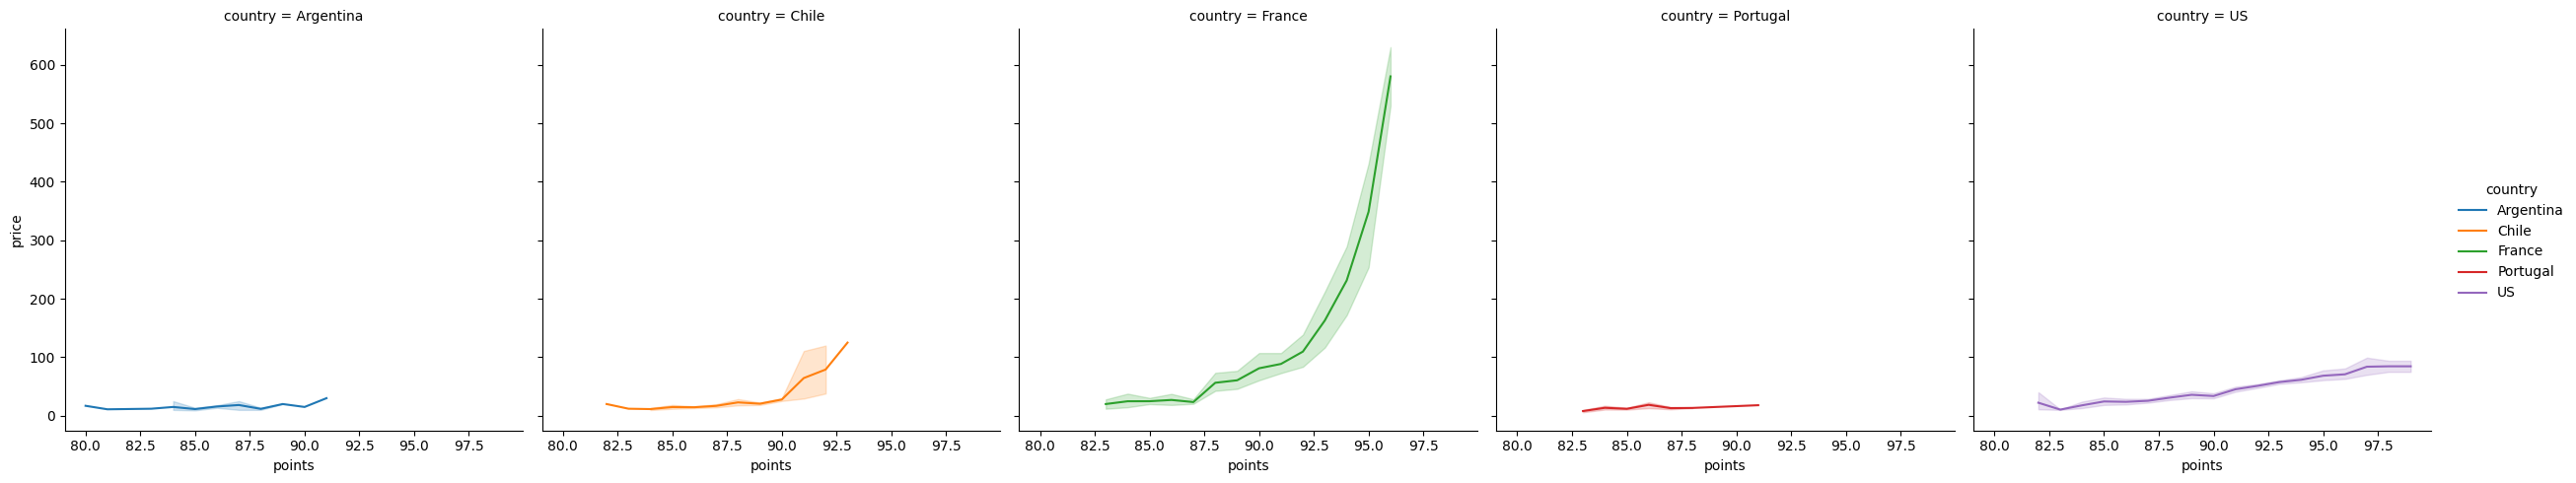

In [30]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=filtered_df)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

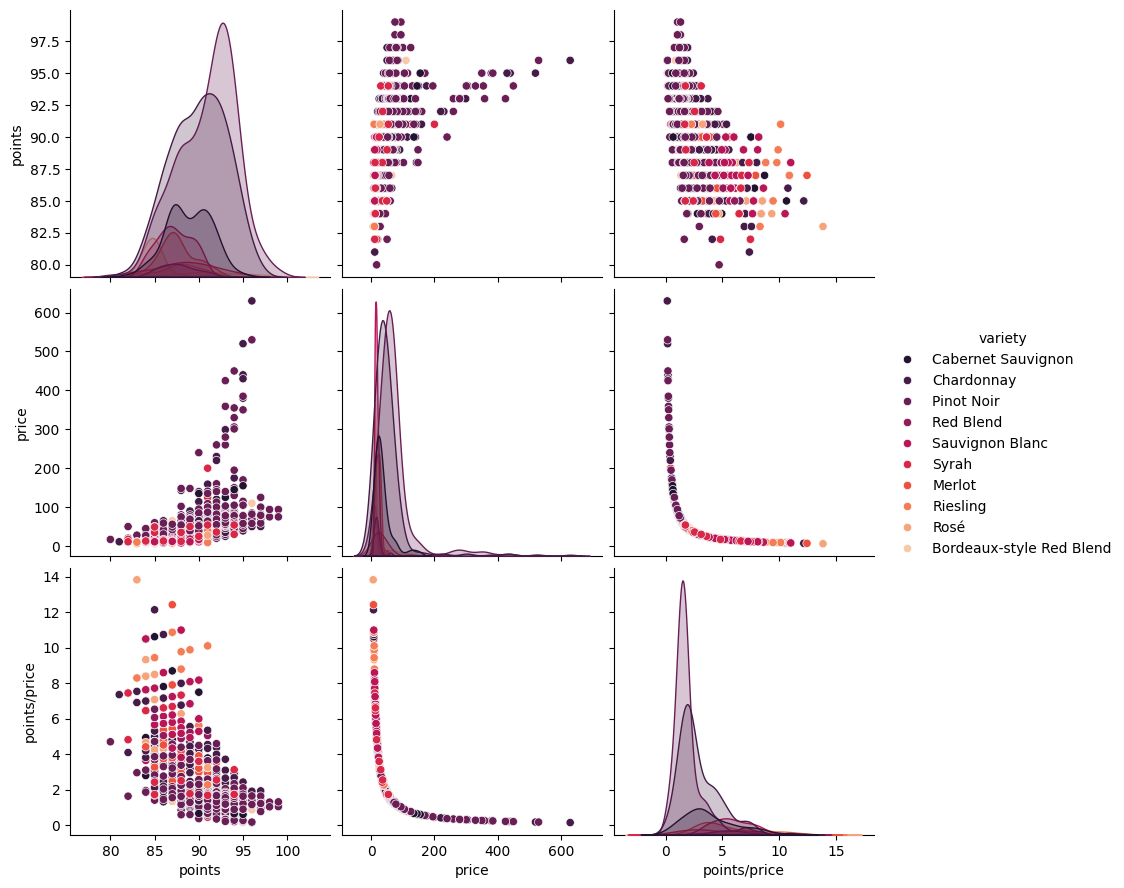

In [31]:
sns.pairplot(filtered_df, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

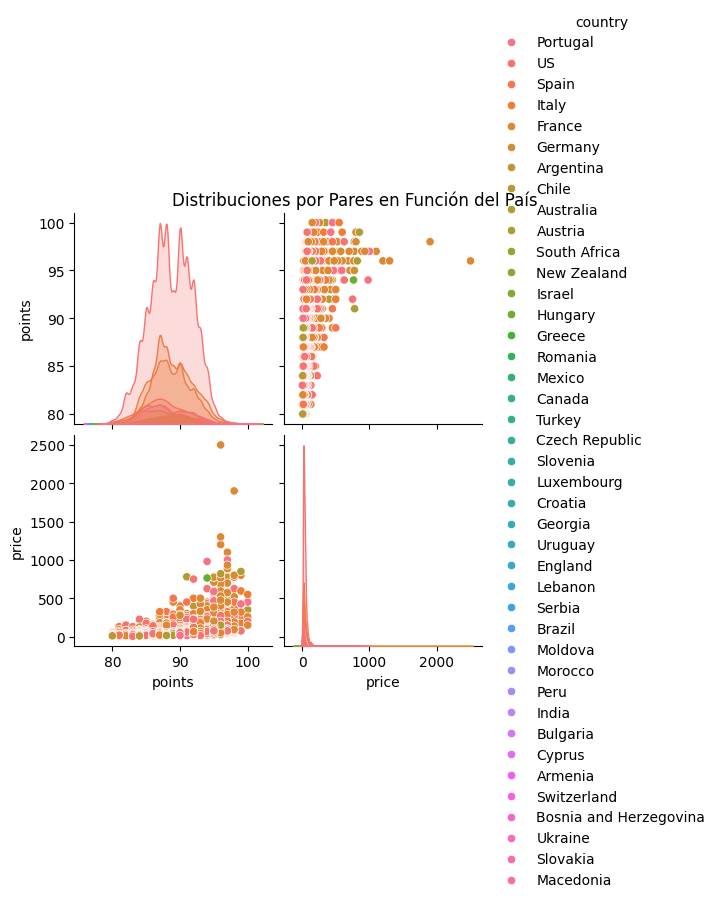

In [32]:
# Filtrar el DataFrame para eliminar valores nulos en las columnas 'points' y 'price'
filtered_df = df.dropna(subset=['points', 'price'])

# Crear un gráfico de distribuciones por pares en función del país
sns.pairplot(filtered_df, hue='country', diag_kind='kde')
plt.suptitle('Distribuciones por Pares en Función del País', y=1.02)
plt.show()


#### &#9758; Observa las distribuciones por pares en función de la bodega.

#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

In [39]:
!pip install pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para eliminar valores nulos en las columnas 'points' y 'price'
filtered_df = df.dropna(subset=['points', 'price'])

# Crear un gráfico de distribuciones por pares en función de la bodega
#sns.pairplot(filtered_df, hue='winery', diag_kind='kde')
sns.pairplot(filtered_df.iloc[:1000], hue='winery', diag_kind='kde')
plt.suptitle('Distribuciones por Pares en Función de la Bodega', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

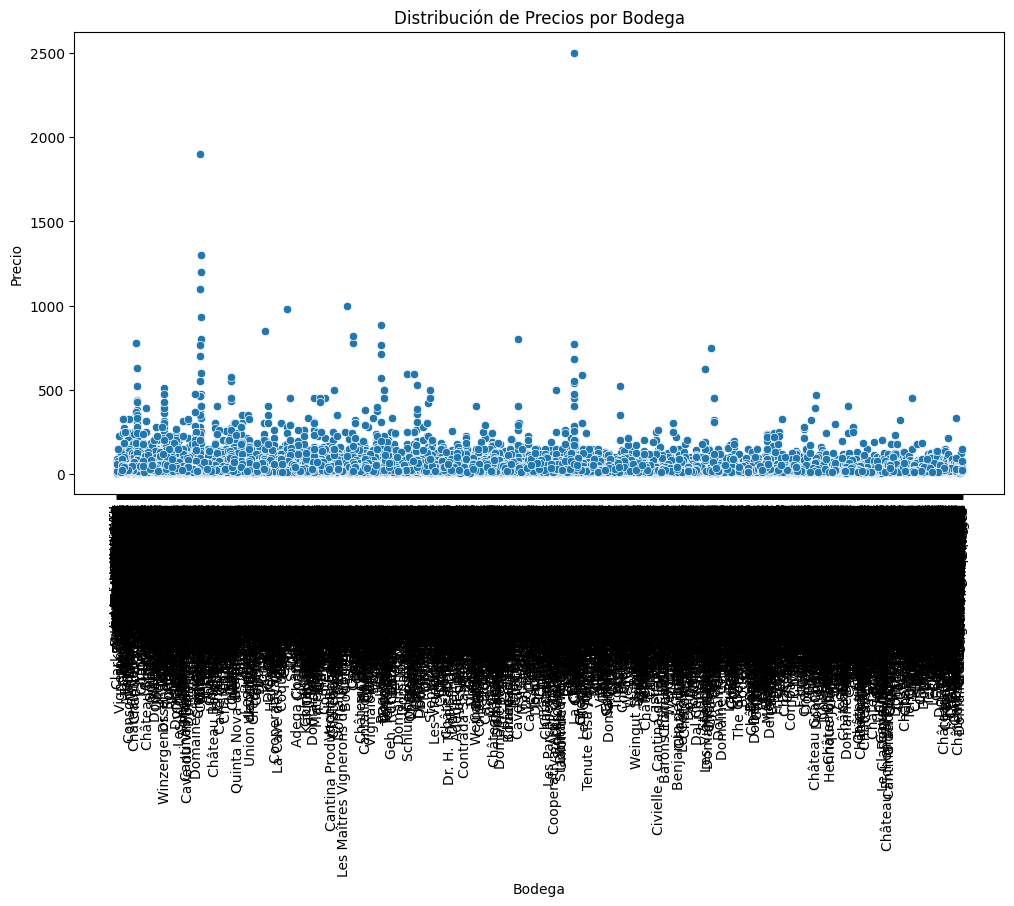

In [35]:
# Filtrar el DataFrame para eliminar valores nulos en la columna 'price'
filtered_df = df.dropna(subset=['price'])

# Crear un gráfico de dispersión de precio por bodega
plt.figure(figsize=(12, 6))
sns.scatterplot(x='winery', y='price', data=filtered_df)
plt.title('Distribución de Precios por Bodega')
plt.xlabel('Bodega')
plt.ylabel('Precio')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

<ipython-input-36-0fa524b2116f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['points/price'] = filtered_df['points'] / filtered_df['price']


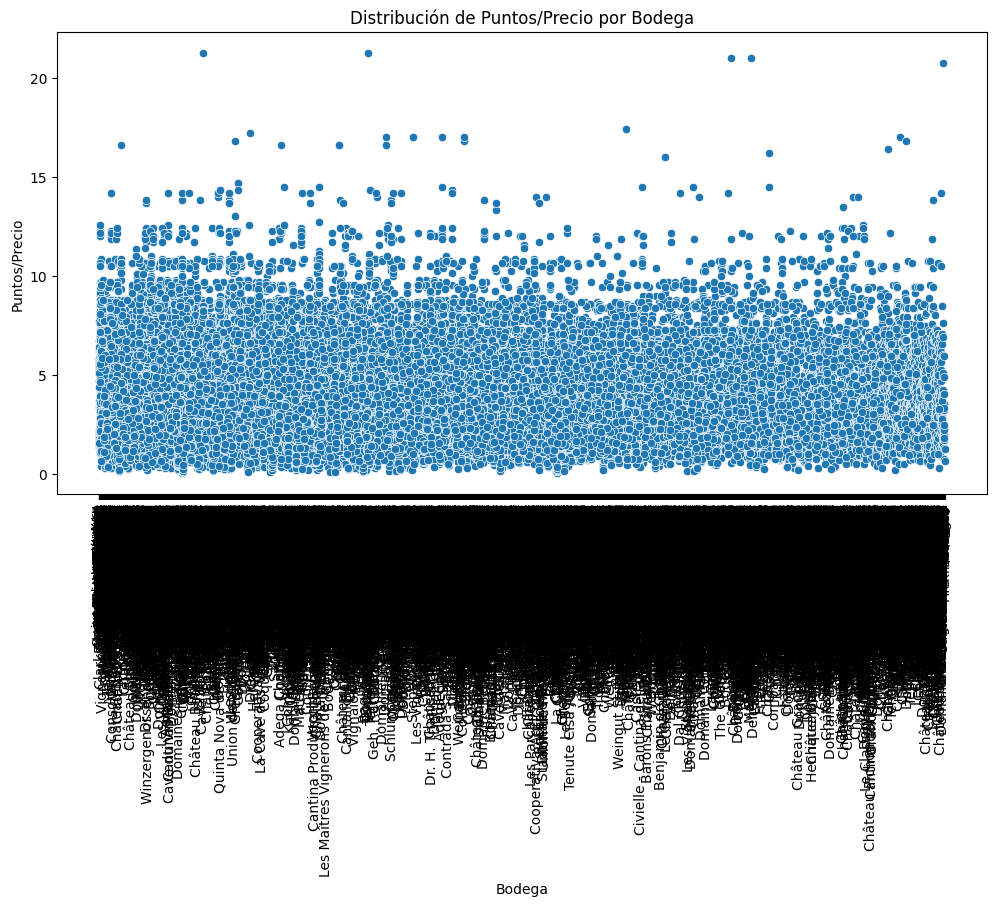

In [36]:
# Filtrar el DataFrame para eliminar valores nulos en las columnas 'points' y 'price'
filtered_df = df.dropna(subset=['points', 'price'])

# Calcular la relación puntos/precio
filtered_df['points/price'] = filtered_df['points'] / filtered_df['price']

# Crear un gráfico de dispersión de puntos/precio por bodega
plt.figure(figsize=(12, 6))
sns.scatterplot(x='winery', y='points/price', data=filtered_df)
plt.title('Distribución de Puntos/Precio por Bodega')
plt.xlabel('Bodega')
plt.ylabel('Puntos/Precio')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

<ipython-input-37-243ccfdb25cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['points/price'] = filtered_df['points'] / filtered_df['price']


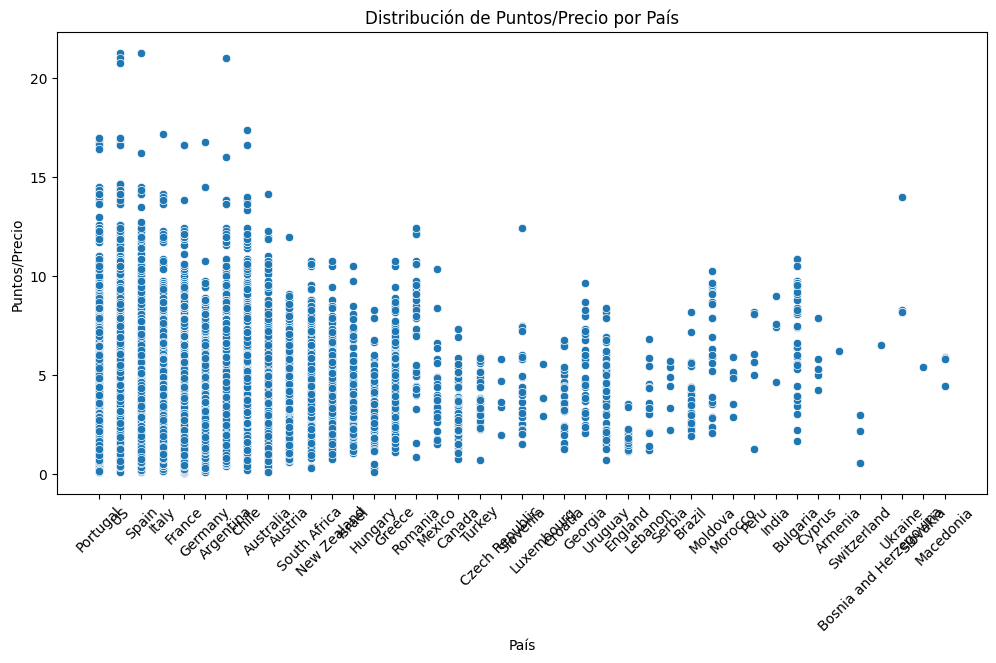

In [37]:

# Filtrar el DataFrame para eliminar valores nulos en las columnas 'points', 'price' y 'country'
filtered_df = df.dropna(subset=['points', 'price', 'country'])

# Calcular la relación puntos/precio
filtered_df['points/price'] = filtered_df['points'] / filtered_df['price']

# Crear un gráfico de dispersión de puntos/precio por país
plt.figure(figsize=(12, 6))
sns.scatterplot(x='country', y='points/price', data=filtered_df)
plt.title('Distribución de Puntos/Precio por País')
plt.xlabel('País')
plt.ylabel('Puntos/Precio')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.show()



### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [41]:
df3 = filtered_df.merge(vinosMX.drop('description', axis=1), how='inner', on=['country', 'winery', 'variety', 'points', 'price'])
print(df3)

   country                                        description  \
0   Mexico  The color is appropriately light, the aromas a...   
1   Mexico  Sauvignon Blanc is, in general, one of Baja's ...   
2   Mexico  Aromas of mature Cabernet: cassis, tobacco lea...   
3   Mexico  While this is fiery on the nose, you also get ...   
4   Mexico  Dark and earthy, slightly pruny and alcoholic,...   
5   Mexico  Oxidized cherry and strawberry aromas settle o...   
6   Mexico  With aromas of salsa, chili peppers and tomato...   
7   Mexico  Mild hints of tropical fruit are less than con...   
8   Mexico  This odd blend of Barbera, Cabernet Sauvignon,...   
9   Mexico  This Cabernet blend is one of Baja's best reds...   
10  Mexico  This is fairly hard and fiery on the nose. The...   
11  Mexico  Fiery, punchy aromas of red berries and herbac...   
12  Mexico  Tropical aromas of lychee and green banana are...   
13  Mexico  This blend of Tempranillo and Grenache is grit...   
14  Mexico  This five-gra

#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [42]:
# Función para calcular points/price
def calculate_points_price(row):
    return row['points'] / row['price']

# Aplicar la función a las filas de df3 para calcular points/price
df3['points/price'] = df3[['points', 'price']].apply(calculate_points_price, axis=1)

# Filtrar los vinos de México
mexican_wines = df3[df3['country'] == 'Mexico']

# Mostrar los resultados
print(mexican_wines[['points', 'price', 'points/price']])


    points  price  points/price
0       88   18.0      4.888889
1       87   15.0      5.800000
2       87   18.0      4.833333
3       88   27.0      3.259259
4       83    8.0     10.375000
5       83   21.0      3.952381
6       86   39.0      2.205128
7       84   15.0      5.600000
8       83   22.0      3.772727
9       90   56.0      1.607143
10      82   25.0      3.280000
11      82   30.0      2.733333
12      87   19.0      4.578947
13      87   33.0      2.636364
14      84   27.0      3.111111
15      86   13.0      6.615385
16      87   58.0      1.500000
17      83   13.0      6.384615
18      87   49.0      1.775510
19      88   22.0      4.000000
20      85   23.0      3.695652
21      88   20.0      4.400000
22      88   26.0      3.384615
23      83   27.0      3.074074
24      89   31.0      2.870968
25      92   54.0      1.703704
26      84   10.0      8.400000
27      86   22.0      3.909091
28      88   40.0      2.200000
29      86   23.0      3.739130


#### &#9758; Observa la relación puntos-precio por país

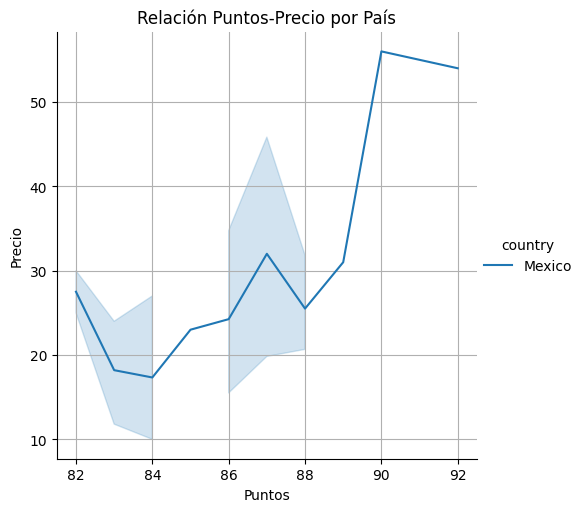

In [44]:
#sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=df3)

# Crear un gráfico relplot de puntos-precio por país
sns.relplot(x="points", y="price", hue="country", kind="line", data=df3)
plt.title('Relación Puntos-Precio por País')
plt.xlabel('Puntos')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

<ipython-input-49-d1255b8485f9>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mx_top = other_data.append(mexican_data)


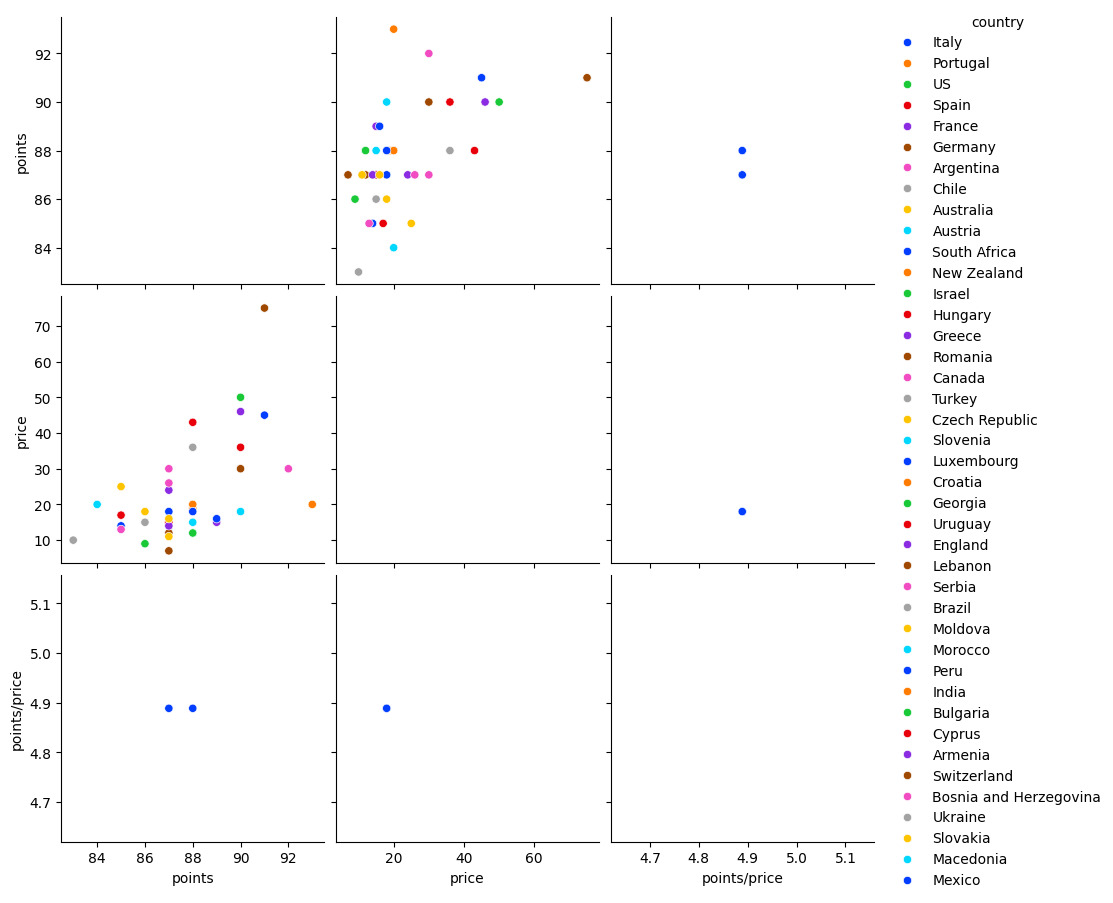

In [49]:
# Obtener los datos de México en df3
mexican_data = df3[df3['country'] == 'Mexico']

# Obtener los datos de otros países en df3
other_data = df[df['country'] != 'Mexico']

# Construir la tabla auxiliar mx_top
mx_top = other_data.append(mexican_data)
mx_top = mx_top.drop_duplicates(subset='country')

# Visualizar las distribuciones por pares en función del país
sns.pairplot(mx_top, hue="country", height=3, palette='bright')
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos por país.

<ipython-input-52-a75306f8387d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)


([0], [Text(0, 0, 'Mexico')])

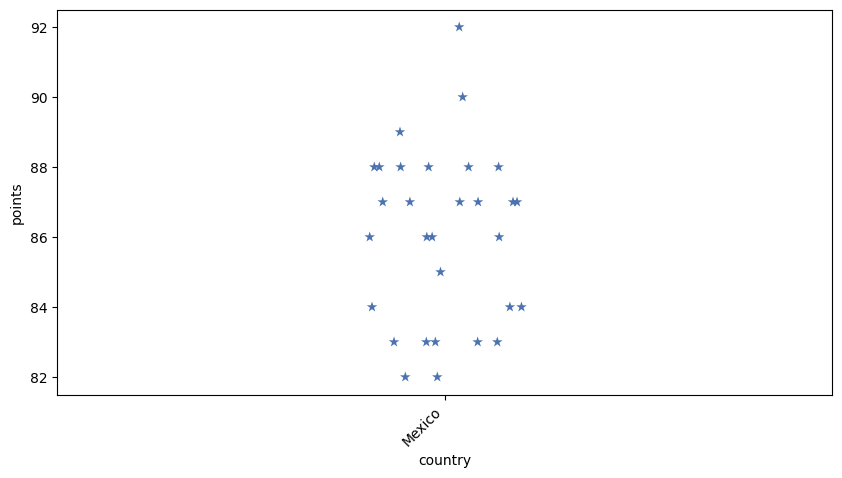

In [52]:
plt.figure(figsize=(10,5))
sns.stripplot(x="country", y="points", data=df3,dodge=True,palette='deep',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

<ipython-input-53-d31340acea07>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'L.A. Cetto'),
  Text(1, 0, 'Monte Xanic'),
  Text(2, 0, 'Cava Aragon'),
  Text(3, 0, 'Hacienda La Lomita'),
  Text(4, 0, 'Tres Valles'),
  Text(5, 0, 'Unión de Productores del Valle (UPVG)'),
  Text(6, 0, 'Vinicola Fraternidad'),
  Text(7, 0, 'Vinos Magbel'),
  Text(8, 0, 'Möebius'),
  Text(9, 0, 'Vinicola Urbana'),
  Text(10, 0, 'Vena Cava'),
  Text(11, 0, 'Viñas de Garza'),
  Text(12, 0, 'Vinisterra'),
  Text(13, 0, 'Cava Maciel'),
  Text(14, 0, 'Rincón de Guadalupe'),
  Text(15, 0, 'La Lomita')])

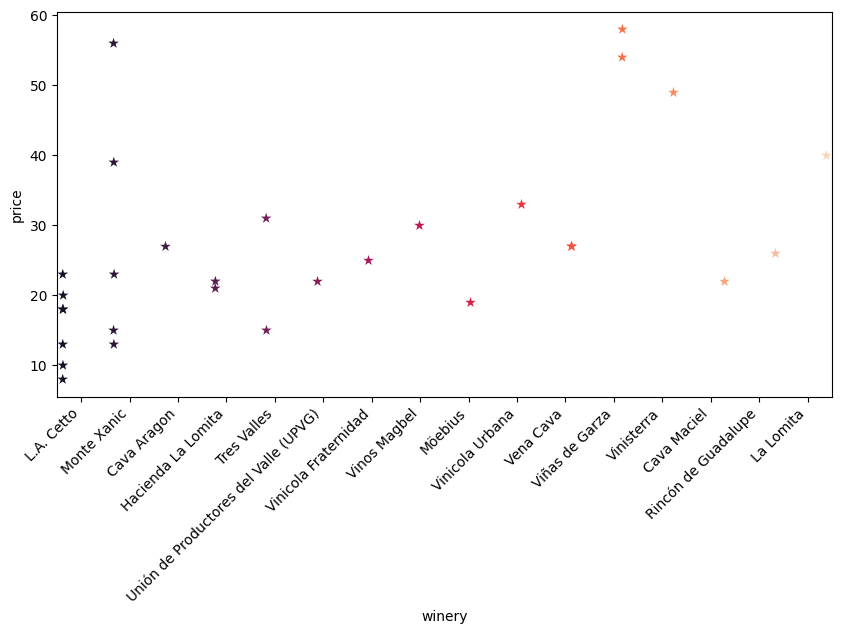

In [53]:
plt.figure(figsize=(10,5))
sns.stripplot(x="winery", y="price", data=df3,dodge=True,palette='rocket',marker='*',size=8)
plt.xticks(rotation= 45, ha="right")

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

<ipython-input-58-cfb1530a947d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  stripplot = sns.stripplot(x='winery', y='points/price', data=mx_top, dodge=True, palette='deep', marker='.', size=6)


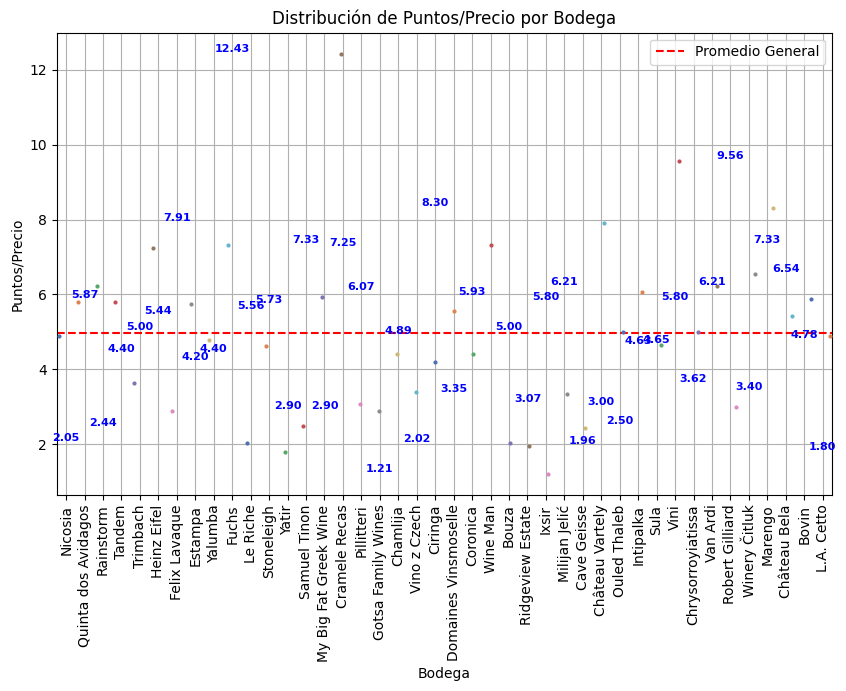

In [58]:
#medias = #<COMPLETA>
# TU CODIGO
# Calcular valores promedio de puntos/precio por bodega
#avg_points_price_by_winery = df.groupby('winery')['points/price'].mean()

# Función para calcular points/price
# Calcular points/price en mx_top
mx_top['points/price'] = mx_top[['points', 'price']].apply(calculate_points_price, axis=1)

# Calcular valores promedio de points/price por bodega
medias = mx_top.groupby('winery')['points/price'].mean()

# Crear un gráfico de dispersión de puntos/precio por bodega
plt.figure(figsize=(10, 6))
stripplot = sns.stripplot(x='winery', y='points/price', data=mx_top, dodge=True, palette='deep', marker='.', size=6)

# Agregar una línea que marque el promedio de todos los datos
plt.axhline(y=mx_top['points/price'].mean(), color='red', linestyle='--', label='Promedio General')

# Dibujar marcas para los valores promedio por cada bodega
for i, (winery, avg) in enumerate(medias.items()):
    plt.text(i, avg, f'{avg:.2f}', ha='center', va='bottom', fontsize=8, color='blue', weight='bold')

plt.title('Distribución de Puntos/Precio por Bodega')
plt.xlabel('Bodega')
plt.ylabel('Puntos/Precio')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.legend()
plt.grid(True)
plt.show()


#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

México queda en lugar 21, con el 3.4%

<ipython-input-94-2c67ae2726a1>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  proportions = top_countries.append(pd.Series(other_countries_avg, index=['Other']))


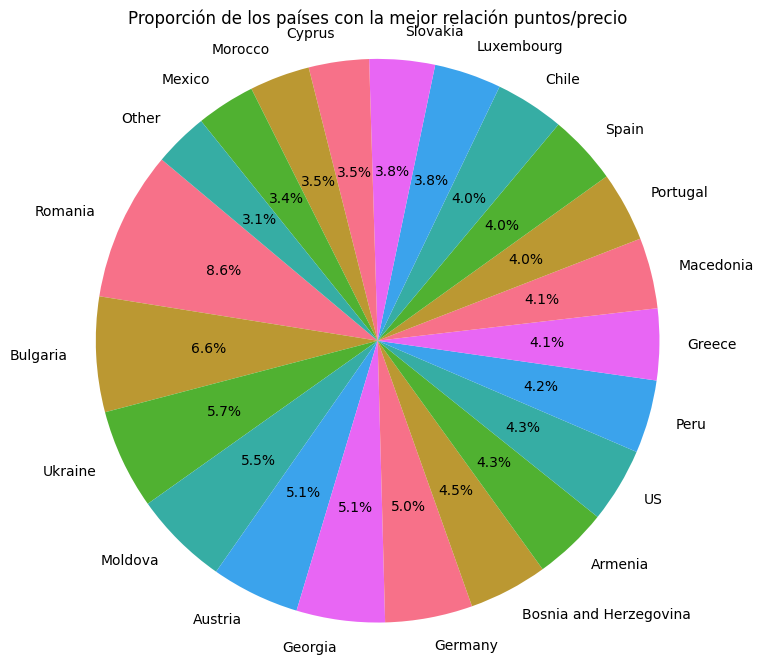

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
#Drop for column points/price in dataframe mx_top
#mx_top.dropna(subset=['points/price'], inplace=True)


# Calcular la proporción de los países con la mejor relación puntos/precio
top_countries = mx_top.groupby('country')['points/price'].mean().nlargest(21)  # Obtener los 5 países con la mejor relación
other_countries_avg = mx_top.groupby('country')['points/price'].mean().nsmallest(len(mx_top['country'].unique()) - 5).mean()  # Obtener el promedio de los otros países
proportions = top_countries.append(pd.Series(other_countries_avg, index=['Other']))

# Crear un gráfico de pastel para visualizar las proporciones
plt.figure(figsize=(8, 8))
sns.set_palette("husl")  # Establecer una paleta de colores
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de los países con la mejor relación puntos/precio')
plt.axis('equal')  # Asegurar que el gráfico de pastel sea un círculo
plt.show()


In [92]:
top_countries_bis = mx_top.groupby('country')['points/price'].mean().nlargest(21)
top_countries_bis

country
Romania                   12.428571
Bulgaria                   9.555556
Ukraine                    8.300000
Moldova                    7.909091
Austria                    7.333333
Georgia                    7.333333
Germany                    7.250000
Bosnia and Herzegovina     6.538462
Armenia                    6.214286
US                         6.214286
Peru                       6.071429
Greece                     5.933333
Macedonia                  5.866667
Portugal                   5.800000
Spain                      5.800000
Chile                      5.733333
Luxembourg                 5.562500
Slovakia                   5.437500
Cyprus                     5.000000
Morocco                    5.000000
Mexico                     4.888889
Name: points/price, dtype: float64